In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join('/home/dennis/llp'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [2]:
from lib import get_model_13_04, ModelBuilder

In [3]:
chat = get_model_13_04()

/home/dennis/.local/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2024-04-20 20:52:55.351711: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-04-20 20:52:55.419479: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-20 20:52:56.365637: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Batches

In [4]:
from openai import OpenAI
import os

VSEGPT_KEY = os.getenv('VSEGPT_KEY')
OPENAI_BASE = os.getenv('OPENAI_BASE')
client = OpenAI(base_url=OPENAI_BASE, api_key=VSEGPT_KEY)

In [5]:
tests = [{"question": "Что такое аддитивное смешивание", "ideal": "Смесь основных цветов, которые прибавляют в различном сочетании их долей"},
{"question": "На каком принципе основано цветное телевидение?", "ideal": "Аддитивное смешивание"},
{"question": "Какие цвета называют основынми пигментными?", "ideal": "Циан, Магента, Желтый"},
{"question": "Сколько пигментов нужно чтобы получить полный спектр?", "ideal":"два или три"},
{"question": "Как получить черный или темно-серый цвет?", "ideal":"Смегением трех пигментных основных цветов"},
{"question": "Что такое круг Освальда?", "ideal":"Шаблон в котором представлены все цвета, которые можно получить смешиванием желтого, красного, голубого"},
{"question": "Что следует знать при однослойном окрашивании?", "ideal":"Двухкомпонентная эмаль должна быть смешена с отвердителем и разжижителем, пежде чем будет проведено окрашивание"}]

In [6]:
for test in tests:
    answer = chat.ask(test['question'])
    test['answer'] = answer['answer']

Batches: 100%|██████████| 1/1 [00:00<00:00, 63.42it/s]


In [8]:
accuracy_criteria = {
    "accuracy": """
Score 10: The submitted answer is a subset of the expert answer and is fully consistent with it.
Score 9: The submitted answer is a superset of the expert answer and is fully consistent with it.
Score 7: The submitted answer contains all the same details as the expert answer.
Score 2: There is a disagreement between the submitted answer and the expert answer.
Score 1: The answers differ, but these differences don't matter from the perspective of factuality."""
}

In [9]:
from langchain.evaluation import load_evaluator

In [8]:
prompt = """
    You are comparing a submitted answer to an expert answer on a given question. Here is the data:
    [BEGIN DATA]
    ************
    [Question]: {question}
    ************
    [Expert]: {ideal}
    ************
    [Submission]: {answer}
    ************
    [END DATA]

    Compare the factual content of the submitted answer with the expert answer. Ignore any differences in style, grammar, or punctuation.
    The submitted answer may either be a subset or superset of the expert answer, or it may conflict with it. Determine which case applies. Answer the question by selecting one of the following options:
    (A) The submitted answer is a subset of the expert answer and is fully consistent with it.
    (B) The submitted answer is a superset of the expert answer and is fully consistent with it.
    (C) The submitted answer contains all the same details as the expert answer.
    (D) There is a disagreement between the submitted answer and the expert answer.
    (E) The answers differ, but these differences don't matter from the perspective of factuality.
    """


messages = [{
        "role": "system",
        "content": prompt
    },
]

completion = client.chat.completions.create(
    model="openai/gpt-3.5-turbo-0125",
    messages=messages,
    temperature=0,
    n=5
)

In [16]:
for test in tests:
    messages.append({
        "role": "user",
        "content": test,
    })

In [9]:
messages

NameError: name 'messages' is not defined

In [10]:
model = ModelBuilder.createVseGptModel("openai/gpt-3.5-turbo-0125", 0)

In [12]:
evaluator = load_evaluator(
    "labeled_score_string",
    criteria=accuracy_criteria,
    llm=model,
)

In [13]:
eval_result = evaluator.evaluate_strings(
    prediction=tests[0]['answer'],
    reference=tests[0]['ideal'],
    input=tests[0]['question'],
)

In [16]:
eval_input = []
for test in tests:
    eval_input.append({
        "prediction": test['answer'],
        "reference": test['ideal'],
        "input": test['question'],
    })

In [17]:
from tqdm import tqdm_notebook
evaluator.batch(eval_input)

[{'prediction': 'Аддитивное цветосмешение - это метод, при котором основные цвета смешиваются в различных сочетаниях и долях для получения белого цвета. Это основа цветного телевидения.',
  'reference': 'Смесь основных цветов, которые прибавляют в различном сочетании их долей',
  'input': 'Что такое аддитивное смешивание',
  'results': {'reasoning': 'The response provided by the AI assistant is accurate and fully consistent with the ground truth. It explains that additive color mixing is a method where primary colors are combined in various combinations and proportions to achieve white color, which is the basis of color television. The response aligns well with the definition provided in the ground truth. \n\nRating: [[10]]',
   'score': 10}},
 {'prediction': 'Цветное телевидение основано на аддитивном цветосмешении, при котором используются различные сочетания долей основных цветов.',
  'reference': 'Аддитивное смешивание',
  'input': 'На каком принципе основано цветное телевидение?',

In [20]:
import pandas as pd

In [28]:
r = resps

In [29]:
for resp in resps:
    resp.update(resp['results'])

In [32]:
for resp in resps:
    del resp['results']

In [33]:
resps[0]

{'prediction': 'Аддитивное цветосмешение - это метод, при котором основные цвета смешиваются в различных сочетаниях и долях для получения белого цвета. Это основа цветного телевидения.',
 'reference': 'Смесь основных цветов, которые прибавляют в различном сочетании их долей',
 'input': 'Что такое аддитивное смешивание',
 'reasoning': 'The response provided by the AI assistant is accurate and fully consistent with the ground truth. It explains that additive color mixing is a method where primary colors are combined in various combinations and proportions to achieve white color, which is the basis of color television. The response aligns well with the definition provided in the ground truth. \n\nRating: [[10]]',
 'score': 10}

In [34]:
df = pd.DataFrame(resps)

In [35]:
df.head()

prediction  \
0  Аддитивное цветосмешение - это метод, при кото...   
1  Цветное телевидение основано на аддитивном цве...   
2  Основные цвета, которые получают с помощью пиг...   
3  Для получения полного спектра цветов нужно три...   
4  Чтобы получить чёрный или тёмносерый цвет, нуж...   

                                           reference  \
0  Смесь основных цветов, которые прибавляют в ра...   
1                              Аддитивное смешивание   
2                              Циан, Магента, Желтый   
3                                        два или три   
4          Смегением трех пигментных основных цветов   

                                               input  \
0                    Что такое аддитивное смешивание   
1    На каком принципе основано цветное телевидение?   
2        Какие цвета называют основынми пигментными?   
3  Сколько пигментов нужно чтобы получить полный ...   
4          Как получить черный или темно-серый цвет?   

                                           reasoning  score  
0  The response provided by the AI assistant is a...     10  
1  The response provided by the AI assistant is a...     10  
2  The user's question in Russian asks about the ...      2  
3  The user question in Russian asks about how ma...      2  
4  The user's question is asking how to achieve b...      2

In [42]:
import matplotlib.pyplot as plt

<StemContainer object of 3 artists>

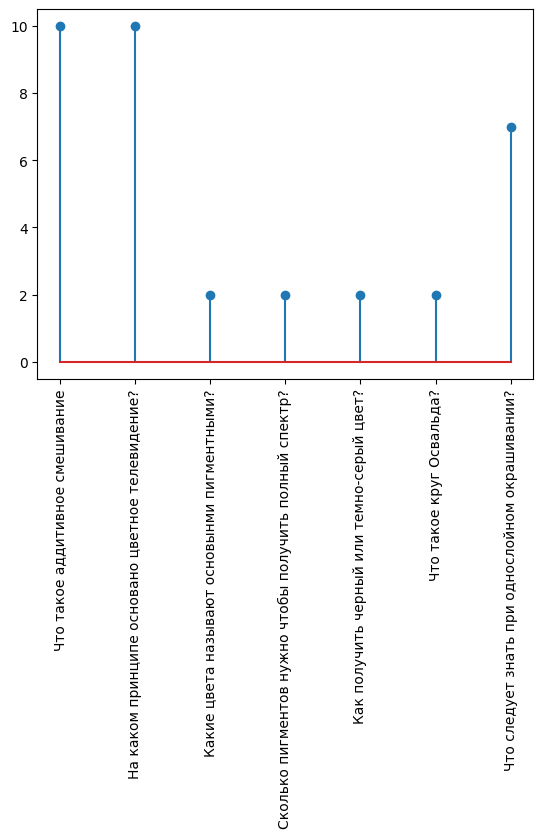

In [45]:
plt.xticks(rotation=90)
plt.stem(df['input'], df['score'])

In [49]:
df['score'] = df['score'].astype('int')

In [52]:
df[['score']].style.applymap(lambda x: "background-color: red" if x < 3 else "background-color: green")

/tmp/ipykernel_1516823/3132272407.py:1: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  df[['score']].style.applymap(lambda x: "background-color: red" if x < 3 else "background-color: green")


In [15]:
tests[0]

{'question': 'Что такое аддитивное смешивание',
 'ideal': 'Смесь основных цветов, которые прибавляют в различном сочетании их долей',
 'answer': 'Аддитивное цветосмешение - это метод, при котором основные цвета смешиваются в различных сочетаниях и долях для получения белого цвета. Это основа цветного телевидения.'}

In [14]:
eval_result

{'reasoning': 'The response provided by the AI assistant is accurate and fully consistent with the ground truth. It explains that additive color mixing is a method where primary colors are combined in various combinations and proportions to achieve white color, which is the basis of color television. The response aligns well with the definition provided in the ground truth. \n\nRating: [[10]]',
 'score': 10}

In [7]:
tests

[{'question': 'Что такое аддитивное смешивание',
  'ideal': 'Смесь основных цветов, которые прибавляют в различном сочетании их долей',
  'answer': 'Аддитивное цветосмешение - это метод, при котором создаются цвета в цветном телевидении. Это происходит когда основные цвета смешиваются в различных сочетаниях и долях. Белый цвет является результатом смешивания всех трех основных цветов при максимальной интенсивности.'},
 {'question': 'На каком принципе основано цветное телевидение?',
  'ideal': 'Аддитивное смешивание',
  'answer': 'Цветное телевидение основано на аддитивном цветосмешении, при котором основные цвета в различных сочетаниях и долях создают другие цвета.'},
 {'question': 'Какие цвета называют основынми пигментными?',
  'ideal': 'Циан, Магента, Желтый',
  'answer': 'Основные цвета, которые получают с помощью пигментов, называют "красным", "жёлтам" и "синим".'},
 {'question': 'Сколько пигментов нужно чтобы получить полный спектр?',
  'ideal': 'два или три',
  'answer': 'Для по

In [8]:
import json

In [9]:
def save_docs_to_jsonl(array, file_path:str)->None:
    with open(file_path, 'w') as jsonl_file:
        for doc in array:
            jsonl_file.write(json.dumps(doc, ensure_ascii=False) + '\n')

    
save_docs_to_jsonl(tests, 'eval.jsonl')

In [10]:
def load_docs_to_jsonl(file_path):
    array = []
    with open(file_path, 'r') as jsonl_file:
        for line in jsonl_file:
            data = json.loads(line)
            array.append(data)
    return array

In [5]:
tests = load_docs_to_jsonl('eval.jsonl')

In [13]:
template = """
    You are comparing a submitted answer to an expert answer on a given question. Here is the data:
    [BEGIN DATA]
    ************
    [Question]: {question}
    ************
    [Expert]: {ideal}
    ************
    [Submission]: {answer}
    ************
    [END DATA]

    Compare the factual content of the submitted answer with the expert answer. Ignore any differences in style, grammar, or punctuation.
    The submitted answer may either be a subset or superset of the expert answer, or it may conflict with it. Determine which case applies. Answer the question by selecting one of the following options:
    (A) The submitted answer is a subset of the expert answer and is fully consistent with it.
    (B) The submitted answer is a superset of the expert answer and is fully consistent with it.
    (C) The submitted answer contains all the same details as the expert answer.
    (D) There is a disagreement between the submitted answer and the expert answer.
    (E) The answers differ, but these differences don't matter from the perspective of factuality.
    """

In [11]:
from langchain_core.prompts import PromptTemplate
from langchain_core.runnables import (
                RunnableLambda,
                RunnableParallel,
                RunnablePassthrough,
            )

In [14]:
prompt = PromptTemplate.from_template(template)

In [14]:
tests[0]

{'question': 'Что такое аддитивное смешивание',
 'ideal': 'Смесь основных цветов, которые прибавляют в различном сочетании их долей',
 'answer': 'Аддитивное цветосмешение - это метод, при котором создаются цвета в цветном телевидении. Это происходит из-за сочетаний основных цветов в различных долях. Белый цвет - это смесь трех основных цветов с максимальной интенсивностью.'}

In [15]:
prompt

PromptTemplate(input_variables=['answer', 'ideal', 'question'], template="\n    You are comparing a submitted answer to an expert answer on a given question. Here is the data:\n    [BEGIN DATA]\n    ************\n    [Question]: {question}\n    ************\n    [Expert]: {ideal}\n    ************\n    [Submission]: {answer}\n    ************\n    [END DATA]\n\n    Compare the factual content of the submitted answer with the expert answer. Ignore any differences in style, grammar, or punctuation.\n    The submitted answer may either be a subset or superset of the expert answer, or it may conflict with it. Determine which case applies. Answer the question by selecting one of the following options:\n    (A) The submitted answer is a subset of the expert answer and is fully consistent with it.\n    (B) The submitted answer is a superset of the expert answer and is fully consistent with it.\n    (C) The submitted answer contains all the same details as the expert answer.\n    (D) There is 

In [17]:
prompt.invoke(tests[0]) 

StringPromptValue(text="\n    You are comparing a submitted answer to an expert answer on a given question. Here is the data:\n    [BEGIN DATA]\n    ************\n    [Question]: Что такое аддитивное смешивание\n    ************\n    [Expert]: Смесь основных цветов, которые прибавляют в различном сочетании их долей\n    ************\n    [Submission]: Аддитивное цветосмешение - это метод, при котором создаются цвета в цветном телевидении. Это происходит из-за сочетаний основных цветов в различных долях. Белый цвет - это смесь трех основных цветов с максимальной интенсивностью.\n    ************\n    [END DATA]\n\n    Compare the factual content of the submitted answer with the expert answer. Ignore any differences in style, grammar, or punctuation.\n    The submitted answer may either be a subset or superset of the expert answer, or it may conflict with it. Determine which case applies. Answer the question by selecting one of the following options:\n    (A) The submitted answer is a su

In [21]:
messages = [prompt.invoke(test).text for test in tests]

In [22]:
messages

["\n    You are comparing a submitted answer to an expert answer on a given question. Here is the data:\n    [BEGIN DATA]\n    ************\n    [Question]: Что такое аддитивное смешивание\n    ************\n    [Expert]: Смесь основных цветов, которые прибавляют в различном сочетании их долей\n    ************\n    [Submission]: Аддитивное цветосмешение - это метод, при котором создаются цвета в цветном телевидении. Это происходит когда основные цвета смешиваются в различных сочетаниях и долях. Белый цвет является результатом смешивания всех трех основных цветов при максимальной интенсивности.\n    ************\n    [END DATA]\n\n    Compare the factual content of the submitted answer with the expert answer. Ignore any differences in style, grammar, or punctuation.\n    The submitted answer may either be a subset or superset of the expert answer, or it may conflict with it. Determine which case applies. Answer the question by selecting one of the following options:\n    (A) The submit

In [1]:
fp = "/home/dennis/llp/eval/evals/registry/data/testrag/testrag.jsonl"

In [3]:
fp.replace(".jsonl", "_predicted.jsonl")

'/home/dennis/llp/eval/evals/registry/data/testrag/testrag_predicted.jsonl'